In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('Pokemon.csv')

df['Type 2'].fillna(df['Type 1'],inplace=True)
df.head(10)

/var/folders/3_/n6p2mfzd44z99j877xw3_pch0000gn/T/ipykernel_19243/189570442.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna(df['Type 1'],inplace=True)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


In [32]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
type_encoded = encoder.fit_transform(df[['Type 1', 'Type 2']]).toarray()
type_columns = encoder.get_feature_names_out(['Type 1', 'Type 2'])
type_encoded_df = pd.DataFrame(type_encoded, columns=type_columns)
df = pd.concat([df.reset_index(drop=True), type_encoded_df], axis=1)
df.drop(columns=['Type 1', 'Type 2'], inplace=True)

In [34]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['HP','Defense','Sp. Atk','Sp. Def','Speed']

scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df.head(10)


,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,Bulbasaur,318,0.173228,49,0.195556,0.298913,0.214286,0.228571,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,Ivysaur,405,0.232283,62,0.257778,0.380435,0.285714,0.314286,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Venusaur,525,0.311024,82,0.346667,0.489130,0.380952,0.428571,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,625,0.311024,100,0.524444,0.608696,0.476190,0.428571,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,Charmander,309,0.149606,52,0.168889,0.271739,0.142857,0.342857,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Charmeleon,405,0.224409,64,0.235556,0.380435,0.214286,0.428571,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Charizard,534,0.303150,84,0.324444,0.538043,0.309524,0.542857,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6,CharizardMega Charizard X,634,0.303150,130,0.471111,0.652174,0.309524,0.542857,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6,CharizardMega Charizard Y,634,0.303150,104,0.324444,0.809783,0.452381,0.542857,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7,Squirtle,314,0.169291,48,0.266667,0.217391,0.209524,0.217143,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
y = df["Attack"]
X = df.drop(columns=['#', 'Attack','Name','Total', 'Generation', 'Legendary'])

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}, MAE: {mae}, R²: {r2}")


MSE: 570.154164375, MAE: 18.016062499999997, R²: 0.4730825226327875


In [39]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 20, 'n_estimators': 200}


In [40]:
import joblib
joblib.dump(model, 'pokemon_attack_predictor_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

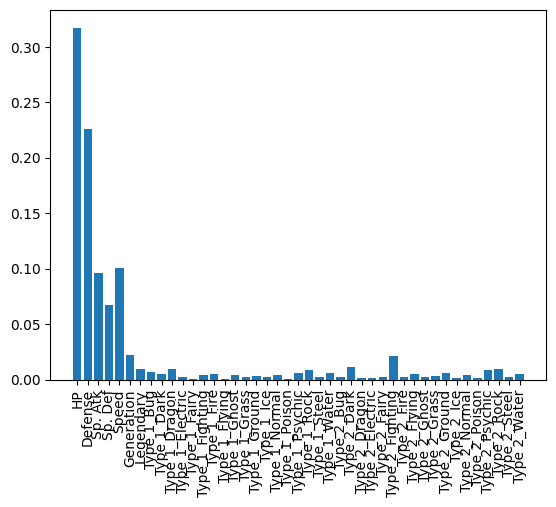

In [41]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.show()
